In [531]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy.linalg import norm
import seaborn as sns
sns.set(style='white',color_codes=True)
plt.rcParams['figure.figsize'] = (12,8)

def tomat(x):
    if len(x.shape) == 1:
        return np.mat(x).T
    else:
        return np.mat(x)

def gd(X,y,alpha=0.001,stop_error=0.0001,max_iter=100):
    X = tomat(sm.add_constant(X))
    m,n = X.shape
    theta0 = np.mat(np.ones((n,1)))
    y = tomat(y)                
    theta = [theta0]
    loss = [0]
    i = 0
    loss_diff = stop_error + 100
    while ((loss_diff>stop_error) and (i<max_iter)):
        h = X @ theta[i]
        error = y - h
        loss.append(norm(error))
        loss_diff = abs(loss[-1]-loss[-2])
        new = theta[i] + alpha * np.transpose(X) @ error
        theta.append(new)
        i = i + 1
    print('The total number of iterations is',i)
    return theta,loss,i

def gd_plot(theta,loss):
    n = theta[0].shape[0]
    plt.subplot(211)
    for i in range(n):
        coef = [x[i].item() for x in theta]
        plt.plot(coef)
    plt.subplot(212)
    plt.plot(loss[1:])

In [444]:
np.random.seed(123)
data = np.random.randn(100,5)
columns = ['x1','x2','x3','x4','x5']
new = pd.DataFrame(columns=columns,data=data)
new['y'] = 20*new.x1 + 10*new.x2 + 30*new.x3 + 40*new.x4 + 50*new.x5 + np.random.randn(100)

In [506]:
cars = sns.load_dataset('mpg').dropna()

In [446]:
X = new.drop('y',axis=1)
y = new.y

In [461]:
theta,loss,i = gd(X,y)

The total number of iterations is 98


In [477]:
def linear_reg(df,formula):
    import statsmodels.formula.api as sm
    result = sm.ols(formula=formula, data=df).fit()
    print(result.summary())

In [478]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [480]:
linear_reg(cars,'mpg~weight+horsepower')

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Wed, 10 Oct 2018   Prob (F-statistic):          3.06e-104
Time:                        12:53:36   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.0

In [561]:
X = cars[['weight_std','horsepower_std']]
y = cars['mpg_std']
theta,loss,i = gd(X,y,alpha=0.001,stop_error=1e-10,max_iter=1000)

The total number of iterations is 178


In [518]:
def zscore(x):
    res = (x-np.mean(x))/np.std(x)
    return res

In [523]:
cars['mpg_std'] = zscore(cars.mpg)
cars['horsepower_std'] = zscore(cars.horsepower)
cars['weight_std'] = zscore(cars.weight)

In [525]:
linear_reg(cars,'mpg_std~horsepower_std+weight_std')

                            OLS Regression Results                            
Dep. Variable:                mpg_std   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Wed, 10 Oct 2018   Prob (F-statistic):          3.06e-104
Time:                        14:03:10   Log-Likelihood:                -316.04
No. Observations:                 392   AIC:                             638.1
Df Residuals:                     389   BIC:                             650.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.377e-16      0.027  -8.65e

In [562]:
theta[-1]

matrix([[-3.42499466e-16],
        [-6.30553942e-01],
        [-2.33290734e-01]])

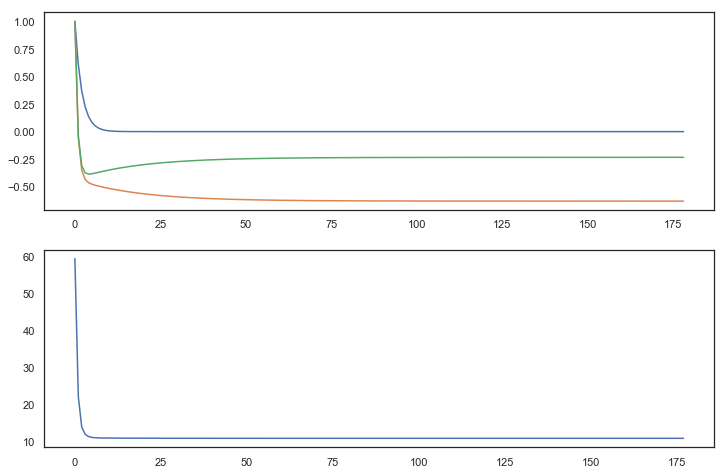

In [563]:
gd_plot(theta,loss)

In [552]:
xx = tomat(X)
yy = tomat(y)

In [553]:
(xx.T@xx).I@xx.T@yy

matrix([[-0.63056597],
        [-0.23327871]])

In [565]:
np.min(X)

weight_std       -1.608575
horsepower_std   -1.520975
dtype: float64

In [583]:
dis = pd.read_clipboard()

In [584]:
dis.head()

,distance,rank,label
0,0.634815,521,largeDoses
1,0.909259,870,smallDoses
2,0.407134,238,didntLike
3,0.893860,853,didntLike
4,0.313497,159,didntLike


In [603]:
res = dis.sort_values('distance')

In [607]:
def knn(df,k):
    from collections import Counter
    res = df.sort_values('distance').label[:k]
    counts = Counter(res)
    most_label = counts.most_common(1)
    return most_label[0][0]

In [608]:
knn(dis,10)

'smallDoses'

In [606]:
type(res)

pandas.core.frame.DataFrame

In [615]:
res[:10].mode()

,distance,rank,label
0,0.023891,1,smallDoses
1,0.031392,2,NaN
2,0.033148,3,NaN
3,0.037802,4,NaN
4,0.047618,5,NaN
5,0.048907,6,NaN
6,0.052652,7,NaN
7,0.059396,8,NaN
8,0.059834,9,NaN
9,0.064782,10,NaN


In [617]:
res[:10].label.mode()

0    smallDoses
dtype: object

In [618]:
res.label.value_counts()

didntLike     342
smallDoses    331
largeDoses    327
Name: label, dtype: int64